**1.** En este bloque se utilizó la librería **pandas** para importar el archivo `"A1.3 NASA.csv"`.  
Se cargó la base de datos en un DataFrame y se imprimieron las dimensiones, los nombres de las columnas y las primeras 15 filas, con el objetivo de verificar que la información se hubiera leído correctamente.  

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("A1.3 NASA.csv")
print("Dimensiones:", df.shape)
print("Columnas:", df.columns.tolist())
print("Primeras 15 filas:")
print(df.head(15))

Dimensiones: (1503, 6)
Columnas: ['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion']
Primeras 15 filas:
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  11

**2.** Se empleó la función **`train_test_split`** de la librería **scikit-learn** para dividir los datos en dos subconjuntos: entrenamiento (70%) y prueba (30%).  
Además, se imprimieron las dimensiones de cada subconjunto y se mostraron algunas filas del conjunto de entrenamiento para confirmar que la separación se realizó correctamente.  

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.7, random_state=42, shuffle=True)
print("Train:", train.shape)
print("Test:", test.shape)
print(train.head())

Train: (1052, 6)
Test: (451, 6)
      frecuencia  angulo  longitud  velocidad   espesor  presion
1191        2500    17.4    0.0254       39.6  0.017221  124.154
1350        2500     6.7    0.1016       71.3  0.004783  131.458
1276        4000     0.0    0.1016       39.6  0.001463  127.801
527          630     2.7    0.1524       39.6  0.002948  125.809
199        16000     0.0    0.2286       71.3  0.002143  114.984


**3.** Se utilizó la librería **statsmodels** para ajustar un modelo de **regresión lineal múltiple** mediante la función **`OLS`**.  
En este bloque se definieron las variables predictoras: **frecuencia, ángulo, longitud, velocidad y espesor**, y la variable respuesta: **presión**.  
Posteriormente, se incluyó una constante con **`add_constant`** para considerar el intercepto en el modelo y se imprimió el resumen completo de resultados con **`summary()`**, así como los *p-values* de cada coeficiente.  


In [16]:
import statsmodels.api as sm

Xcols = ["frecuencia","angulo","longitud","velocidad","espesor"]
ycol = "presion"

X_train = train[Xcols]
y_train = train[ycol]

X_test = test[Xcols]
y_test = test[ycol]

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

results = sm.OLS(y_train, X_train_sm).fit()

print(results.summary())
print("P-values por variable (incluye const):")
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.9
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          1.38e-164
Time:                        23:49:40   Log-Likelihood:                -3138.0
No. Observations:                1052   AIC:                             6288.
Df Residuals:                    1046   BIC:                             6318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4778      0.651    203.367      0.0

**4.** A partir de los resultados del modelo, se listaron los *p-values* únicamente de las variables predictoras (excluyendo el intercepto).  
Con base en ello, se identificaron aquellas variables con un nivel de significancia estadística de **p < 0.05**.  
Finalmente, se mostró la variable con el menor *p-value*, considerándola como la **más importante** dentro del modelo.  

In [17]:
pvals = results.pvalues.drop(labels=["const"], errors="ignore")
print("P-values (solo predictores):")
print(pvals)

print("Variables significativas (p < 0.05):")
print(pvals[pvals < 0.05])

print("Variable con menor p-value:")
print(pvals.sort_values().head(1).index[0])

P-values (solo predictores):
frecuencia    1.667773e-118
angulo         2.097471e-14
longitud       4.981210e-63
velocidad      4.963051e-24
espesor        2.818412e-17
dtype: float64
Variables significativas (p < 0.05):
frecuencia    1.667773e-118
angulo         2.097471e-14
longitud       4.981210e-63
velocidad      4.963051e-24
espesor        2.818412e-17
dtype: float64
Variable con menor p-value:
frecuencia


**5.** Se calcularon dos métricas de desempeño del modelo en los conjuntos de entrenamiento y prueba:  
- **RSE (Residual Standard Error)**: se obtuvo a partir de la raíz cuadrada del error cuadrático medio.  
- **R² (Coeficiente de determinación)**: mide la proporción de la variabilidad explicada por el modelo.  
De esta forma, se imprimieron los valores de RSE y R² para ambos conjuntos, lo que permitió comparar la capacidad de ajuste en entrenamiento y validación.  

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
import math

RSE_train = math.sqrt(results.scale)
R2_train = results.rsquared

y_pred_test = results.predict(X_test_sm)
RSE_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
R2_test = r2_score(y_test, y_pred_test)

print("RSE (train):", RSE_train)
print("R²  (train):", R2_train)
print("RSE (test):", RSE_test)
print("R²  (test):", R2_test)

RSE (train): 4.791436345798008
R²  (train): 0.5214416938715567
RSE (test): 4.867017391586263
R²  (test): 0.4982726587937769


**6.** Finalmente, se generó una **gráfica de dispersión** entre los valores reales de la variable respuesta y los valores estimados por el modelo en el conjunto de prueba.  
Se añadió una línea de 45° como referencia, la cual representa el ajuste perfecto.  
Al comparar los puntos con esta línea, se puede evaluar visualmente la calidad del ajuste obtenido por el modelo.  

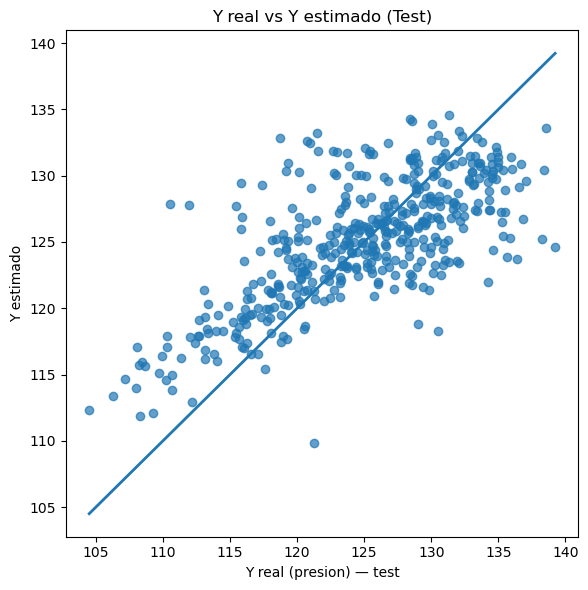

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
mn = min(y_test.min(), y_pred_test.min())
mx = max(y_test.max(), y_pred_test.max())
plt.plot([mn, mx], [mn, mx], linewidth=2)
plt.xlabel("Y real (presion) — test")
plt.ylabel("Y estimado")
plt.title("Y real vs Y estimado (Test)")
plt.tight_layout()
plt.show()